In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

# Loading the dataset 

In [2]:
df=pd.read_csv('train_data.csv',index_col=[0])

In [3]:
df

,Sample Name,Sample ID,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4,Bacteria
0,Cepheus_01010101,1010101,1.010000,0.203000,0.154000,1.685000,1.570000,19.100000,5.230000,12.060000,19.500000,2.390000,0.668000,17.300000,1.640000,2.060000,4.930000,18.300000,3.610000,18.800000,18.800000,18.800000,18.700000,Raizovox
1,Cepheus_01010102,1010102,0.209000,0.127000,0.028600,1.245000,11.700000,10.900000,15.700000,7.400000,21.800000,0.537000,0.554000,10.500000,15.300000,0.633000,1.210000,10.700000,15.900000,10.600000,10.600000,10.700000,10.500000,Raizovox
2,Cepheus_01010103,1010103,0.178000,0.026100,0.013700,0.585000,5.450000,2.190000,7.660000,3.400000,22.800000,0.336000,0.394000,1.780000,18.900000,0.561000,0.671000,1.790000,19.100000,1.870000,1.870000,1.780000,1.780000,Raizovox
3,Cepheus_01010104,1010104,0.100000,0.010800,0.004160,0.371500,4.820000,8.370000,10.800000,0.632000,15.700000,0.262000,0.136000,8.050000,10.100000,0.403000,0.441000,8.030000,10.200000,7.980000,7.980000,8.100000,8.100000,Flitter
4,Cepheus_01010105,1010105,3.760000,1.410000,1.410000,4.420000,1.950000,10.800000,3.790000,10.780000,12.200000,10.600000,1.570000,2.130000,13.500000,16.400000,3.400000,9.780000,14.900000,2.130000,2.130000,2.130000,2.130000,Elixoria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89035,Cepheus_01099136,1099136,16.323489,15.423214,5.716073,8.424158,3.499194,17.693025,0.789872,31.853857,6.774368,6.564505,9.677351,0.893712,9.665364,8.175638,16.090341,8.705159,15.574595,1.454782,13.607616,8.677514,4.385386,Cruor
89036,Cepheus_01099137,1099137,6.151785,4.464168,11.646779,1.158803,16.062893,17.220753,19.522085,22.034965,22.395995,1.306657,4.083739,13.006844,1.656437,16.647813,3.924598,20.773649,6.652554,8.380580,2.907607,10.653868,6.323541,Cruor
89037,Cepheus_01099138,1099138,4.599115,2.172137,18.828643,11.247750,16.695487,20.980221,18.111516,14.754549,14.665731,11.665458,21.069619,6.227113,6.393223,21.163247,22.977247,20.098111,2.695600,6.519093,0.600094,18.904841,13.894046,Cruor
89038,Cepheus_01099139,1099139,15.182662,14.646130,10.889748,6.828814,19.043423,10.489778,7.197988,24.462583,11.124273,18.372653,17.669816,4.828758,1.030378,3.766912,8.408882,3.792999,17.699832,3.147423,16.278545,0.409337,7.505594,Elixoria


In [4]:
# Dropping the Nominal Features
df=df.drop(['Sample Name','Sample ID'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83471 entries, 0 to 89039
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Perimeter             83471 non-null  float64
 1   Filled Area           83471 non-null  float64
 2   Convex Area           83471 non-null  float64
 3   Equivalent Radius     83471 non-null  float64
 4   Extent                83471 non-null  float64
 5   Points of Extremum    83471 non-null  float64
 6   Compactness           83471 non-null  float64
 7   Diameter              83471 non-null  float64
 8   Direction             83471 non-null  float64
 9   Length of Major Axis  83471 non-null  float64
 10  Length of Minor Axis  83471 non-null  float64
 11  Bordered Area 1       83471 non-null  float64
 12  Bordered Area 2       83471 non-null  float64
 13  Bordered Area 3       83471 non-null  float64
 14  Bordered Area 4       83471 non-null  float64
 15  Centroid 1         

In [6]:
# Analysis of numeriala features
df.describe()

,Perimeter,Filled Area,Convex Area,Equivalent Radius,Extent,Points of Extremum,Compactness,Diameter,Direction,Length of Major Axis,Length of Minor Axis,Bordered Area 1,Bordered Area 2,Bordered Area 3,Bordered Area 4,Centroid 1,Centroid 2,Convex Hull 1,Convex Hull 2,Convex Hull 3,Convex Hull 4
count,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000,83471.000000
mean,5.132319,4.853630,4.732365,3.389111,8.026933,11.733838,10.326421,15.006004,11.699333,5.555159,5.198924,11.170689,10.900607,5.869745,6.179343,11.680828,11.637974,11.268801,11.270207,11.224801,11.233208
std,6.734646,6.889389,6.949536,2.994564,5.604733,6.296612,5.307981,11.468607,6.568537,6.551516,6.713009,6.323506,6.134315,6.452082,6.345466,6.268613,6.058714,6.265789,6.271222,6.305294,6.325459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.394000,0.183000,0.059000,1.305000,3.710000,6.300000,6.264287,6.420000,5.982351,0.870000,0.589000,5.690000,5.860000,1.150000,1.520000,6.360000,6.680000,5.910000,5.910000,5.750000,5.730000
50%,1.260000,0.546000,0.312000,2.185000,6.390000,11.800000,9.600000,12.600999,12.000000,2.170000,1.380000,11.100000,10.518113,2.700000,3.340000,11.876076,11.500000,11.209892,11.200000,11.171331,11.186527
75%,8.706715,8.639835,8.617947,4.735650,11.253694,17.255513,13.990016,19.561425,17.200000,8.957438,8.697578,16.480579,15.800000,9.208647,9.251374,17.000000,16.600000,16.500000,16.500000,16.500000,16.500000
max,23.000000,23.000000,23.000000,11.500000,23.000000,23.000000,23.000000,46.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


In [7]:
df.describe(include='object')

,Bacteria
count,83471
unique,9
top,Charmayanne
freq,9375


In [8]:
# Conting nan values in each column
df.isnull().sum()                                                         

Perimeter               0
Filled Area             0
Convex Area             0
Equivalent Radius       0
Extent                  0
Points of Extremum      0
Compactness             0
Diameter                0
Direction               0
Length of Major Axis    0
Length of Minor Axis    0
Bordered Area 1         0
Bordered Area 2         0
Bordered Area 3         0
Bordered Area 4         0
Centroid 1              0
Centroid 2              0
Convex Hull 1           0
Convex Hull 2           0
Convex Hull 3           0
Convex Hull 4           0
Bacteria                0
dtype: int64

# Part 1: Data Visualization

In [9]:
sns.set(rc={'figure.figsize':(9,5)})

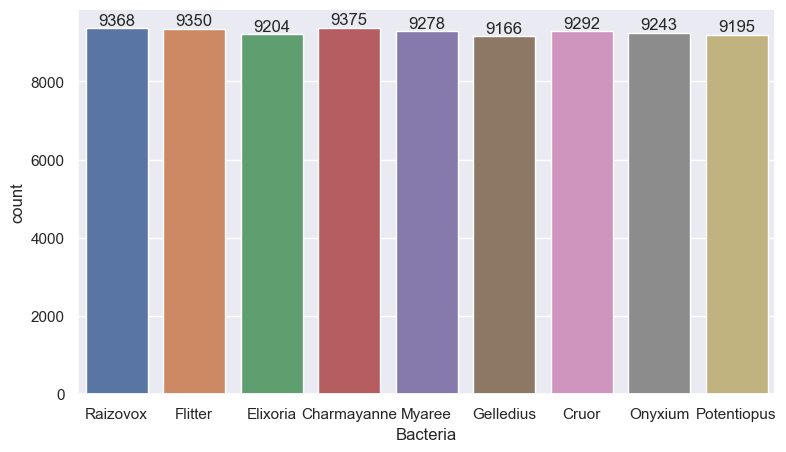

In [10]:
ax=sns.countplot(x='Bacteria',data=df)
for i in ax.containers:
    ax.bar_label(i,)

### ` We can see our dataset is quite balanced with respect to each category `

In [11]:
col=df.columns
col

Index(['Perimeter', 'Filled Area', 'Convex Area', 'Equivalent Radius',
       'Extent', 'Points of Extremum', 'Compactness', 'Diameter', 'Direction',
       'Length of Major Axis', 'Length of Minor Axis', 'Bordered Area 1',
       'Bordered Area 2', 'Bordered Area 3', 'Bordered Area 4', 'Centroid 1',
       'Centroid 2', 'Convex Hull 1', 'Convex Hull 2', 'Convex Hull 3',
       'Convex Hull 4', 'Bacteria'],
      dtype='object')

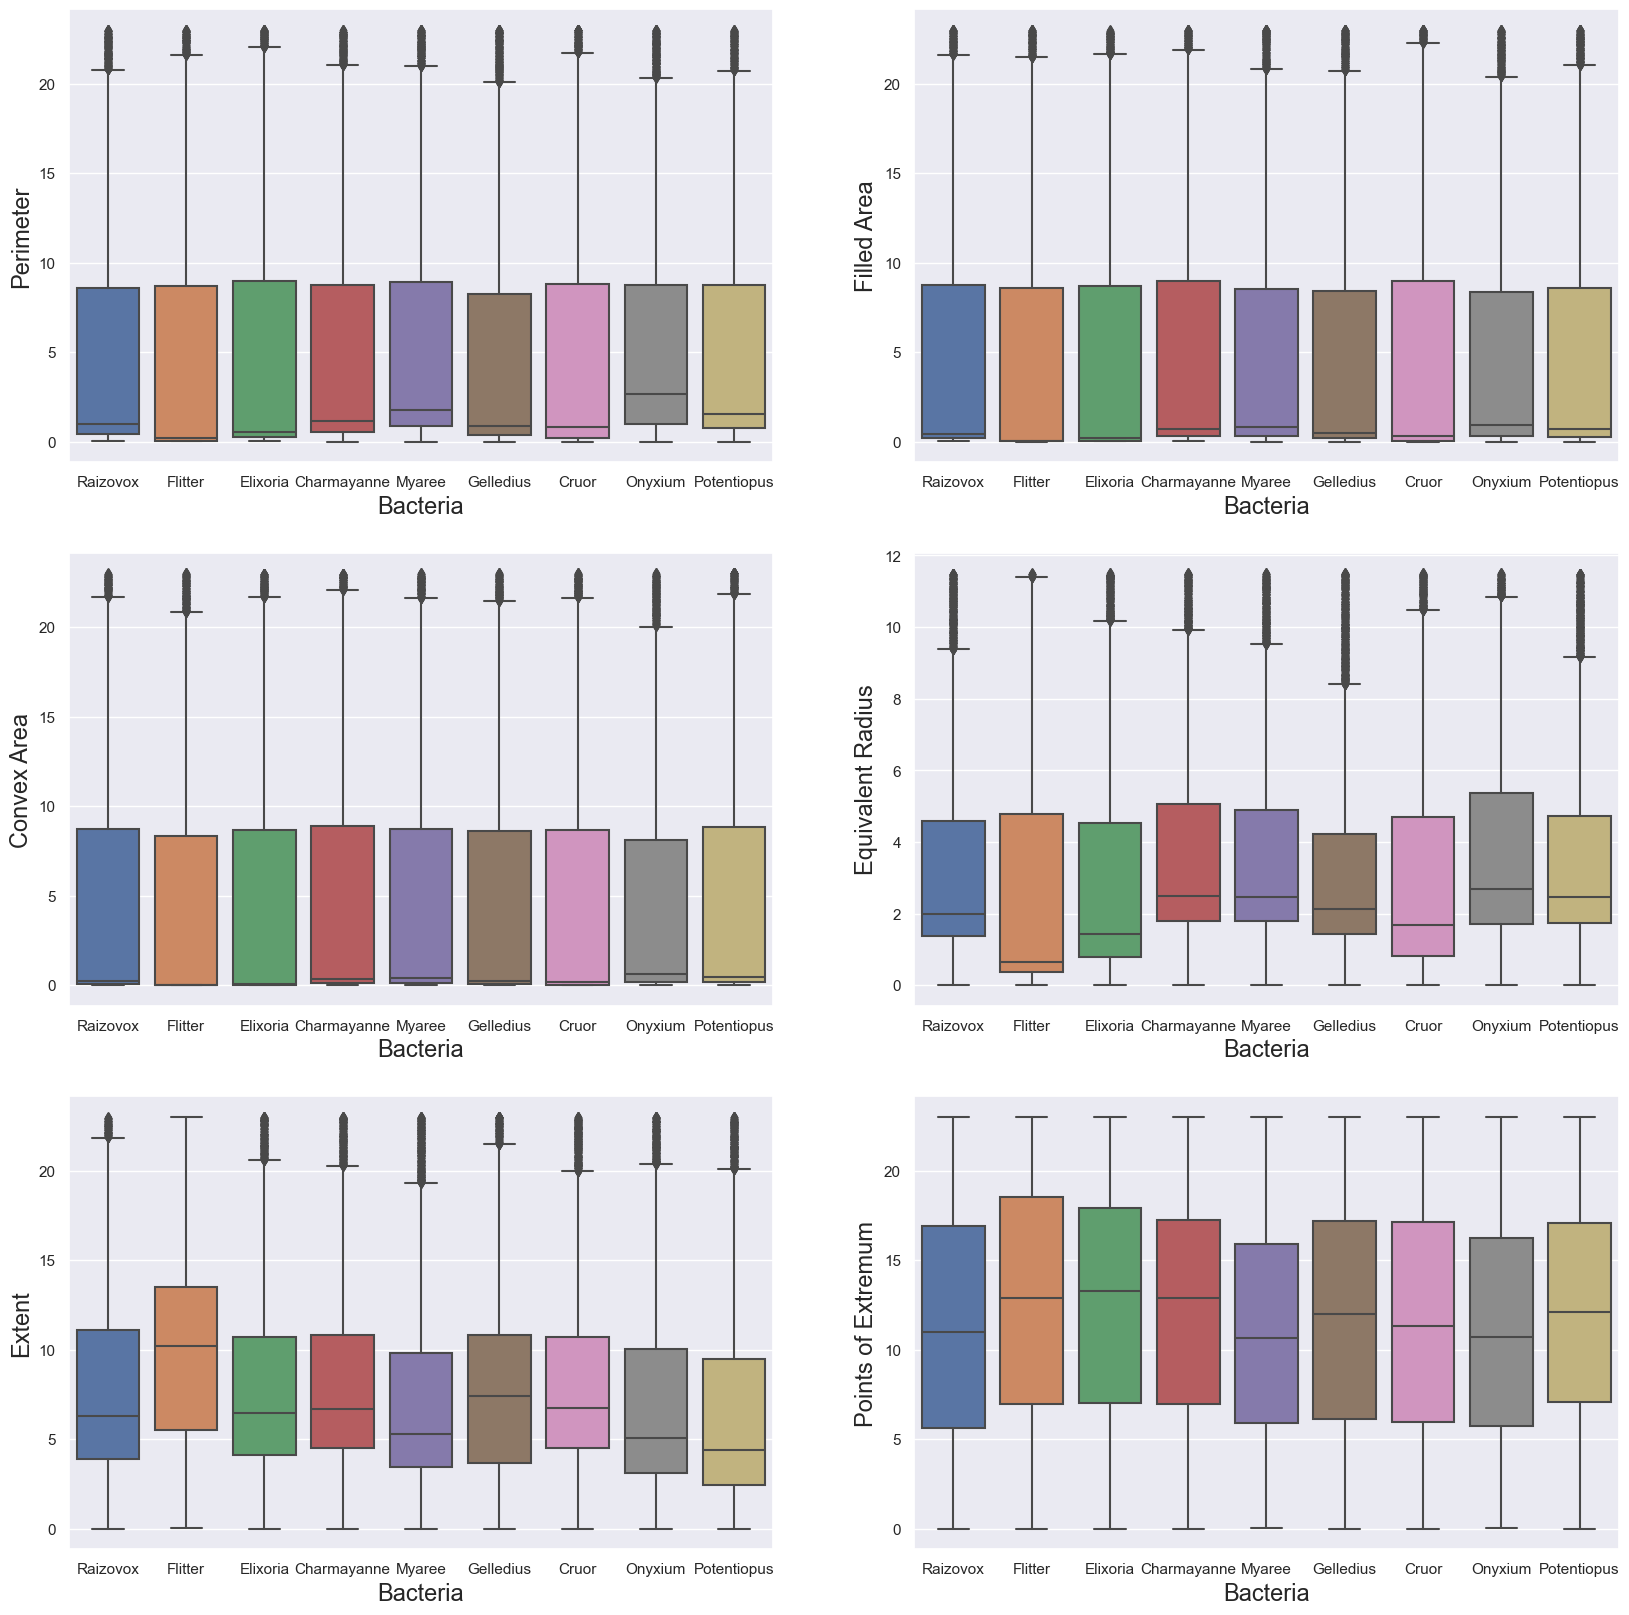

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1
for j in col[:6]:
    if plotnumber<=25:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(y=j,x='Bacteria',data=df)
        plt.xlabel('Bacteria',fontsize=17)
        plt.ylabel(j,fontsize=17)
        plotnumber+=1

### ` Equivalent Radius, Extend, Point of Extremeum are seeming to be important factors  `

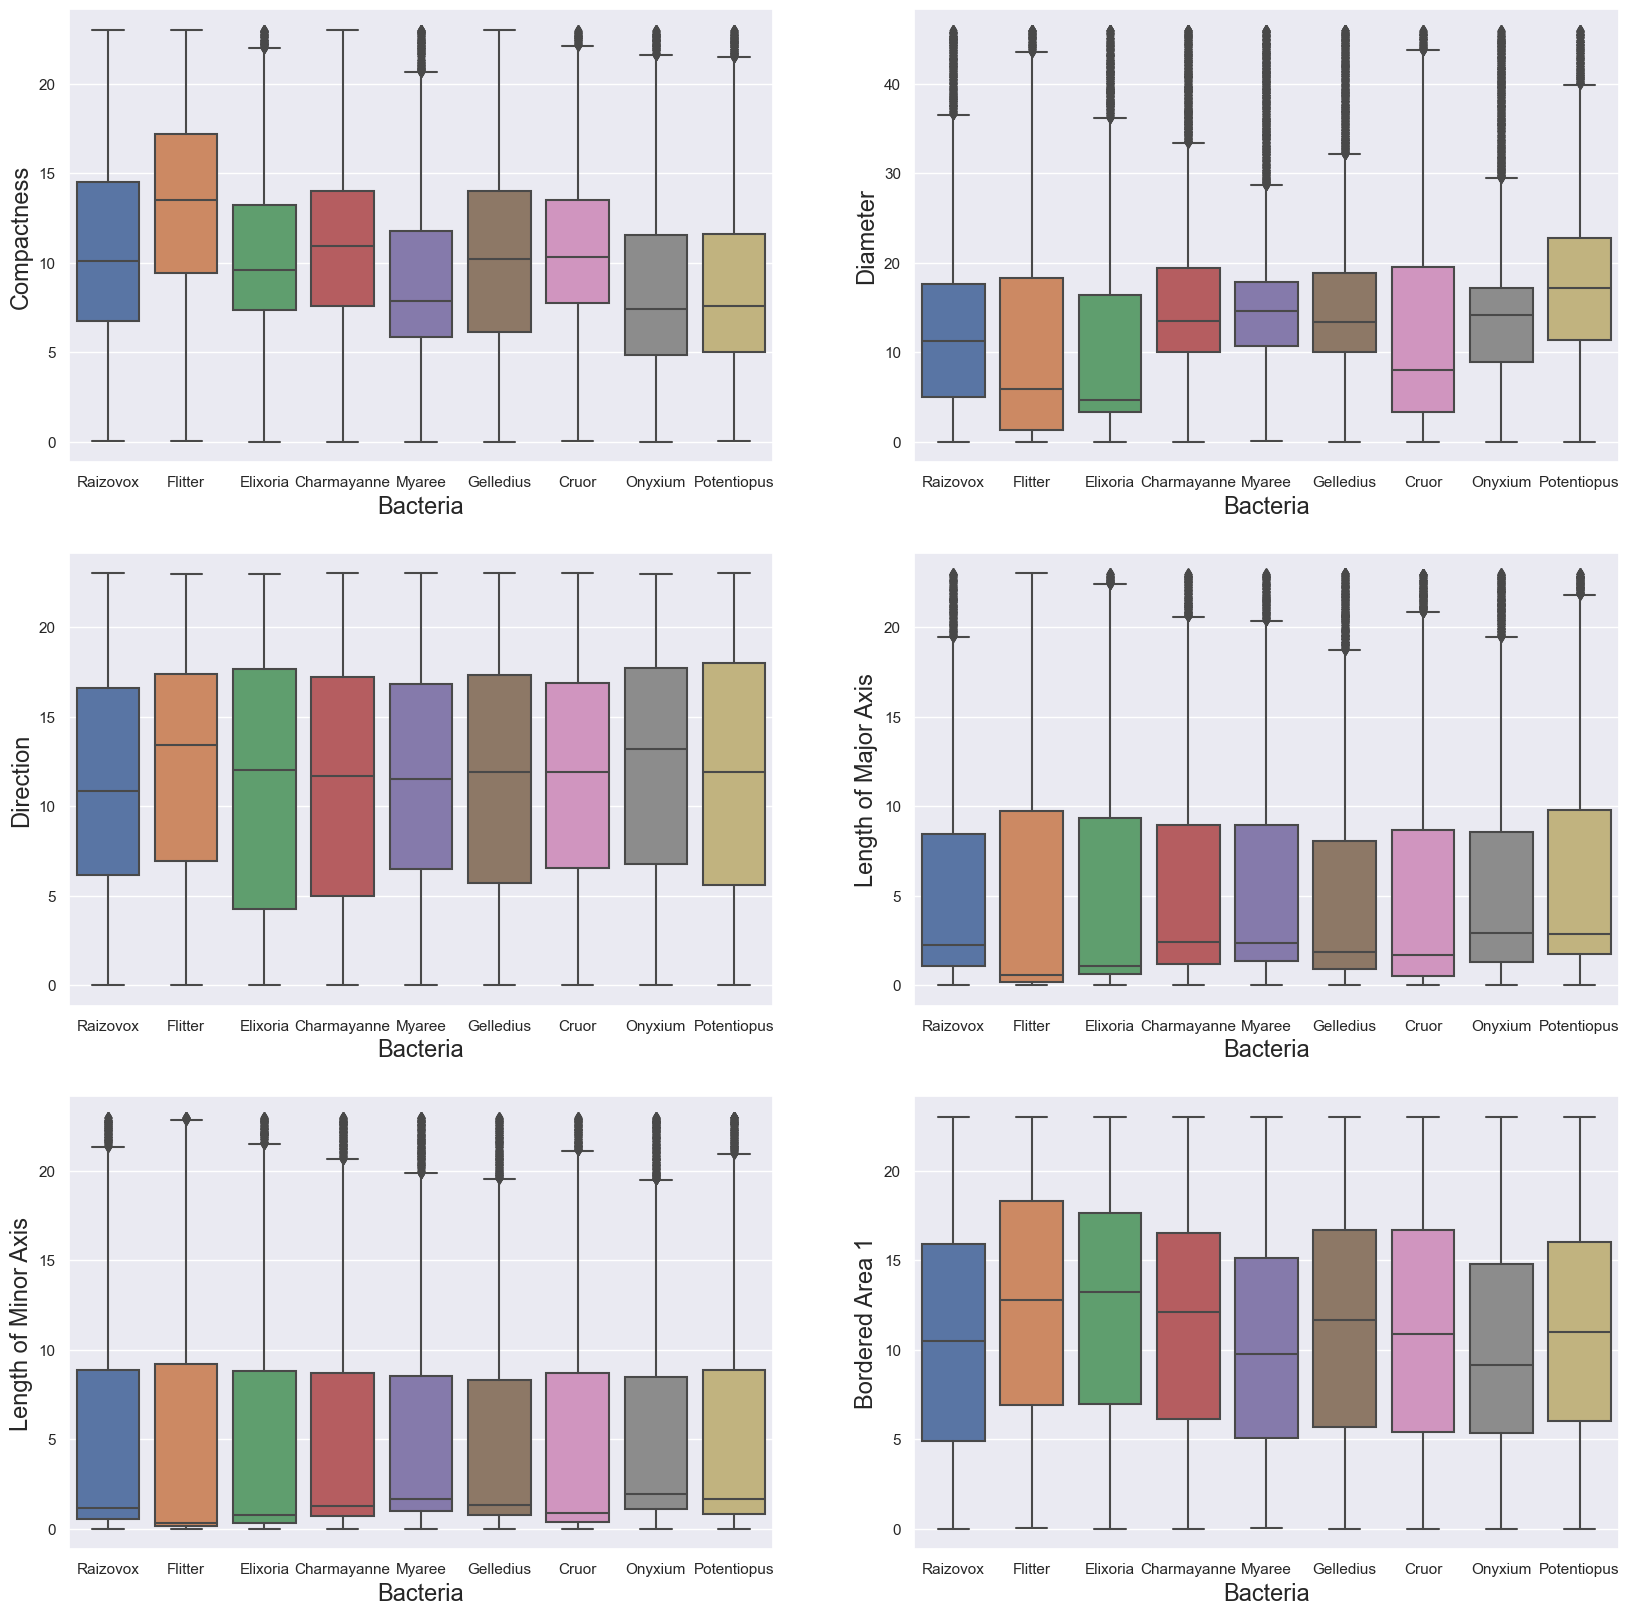

In [13]:
plt.figure(figsize=(20,20))
plotnumber=1
for j in col[6:12]:
    if plotnumber<=25:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x='Bacteria',y=j,data=df)
        plt.xlabel('Bacteria',fontsize=17)
        plt.ylabel(j,fontsize=17)
        plotnumber+=1

### ` Compactness, diameter, and Border area 1 are also important `

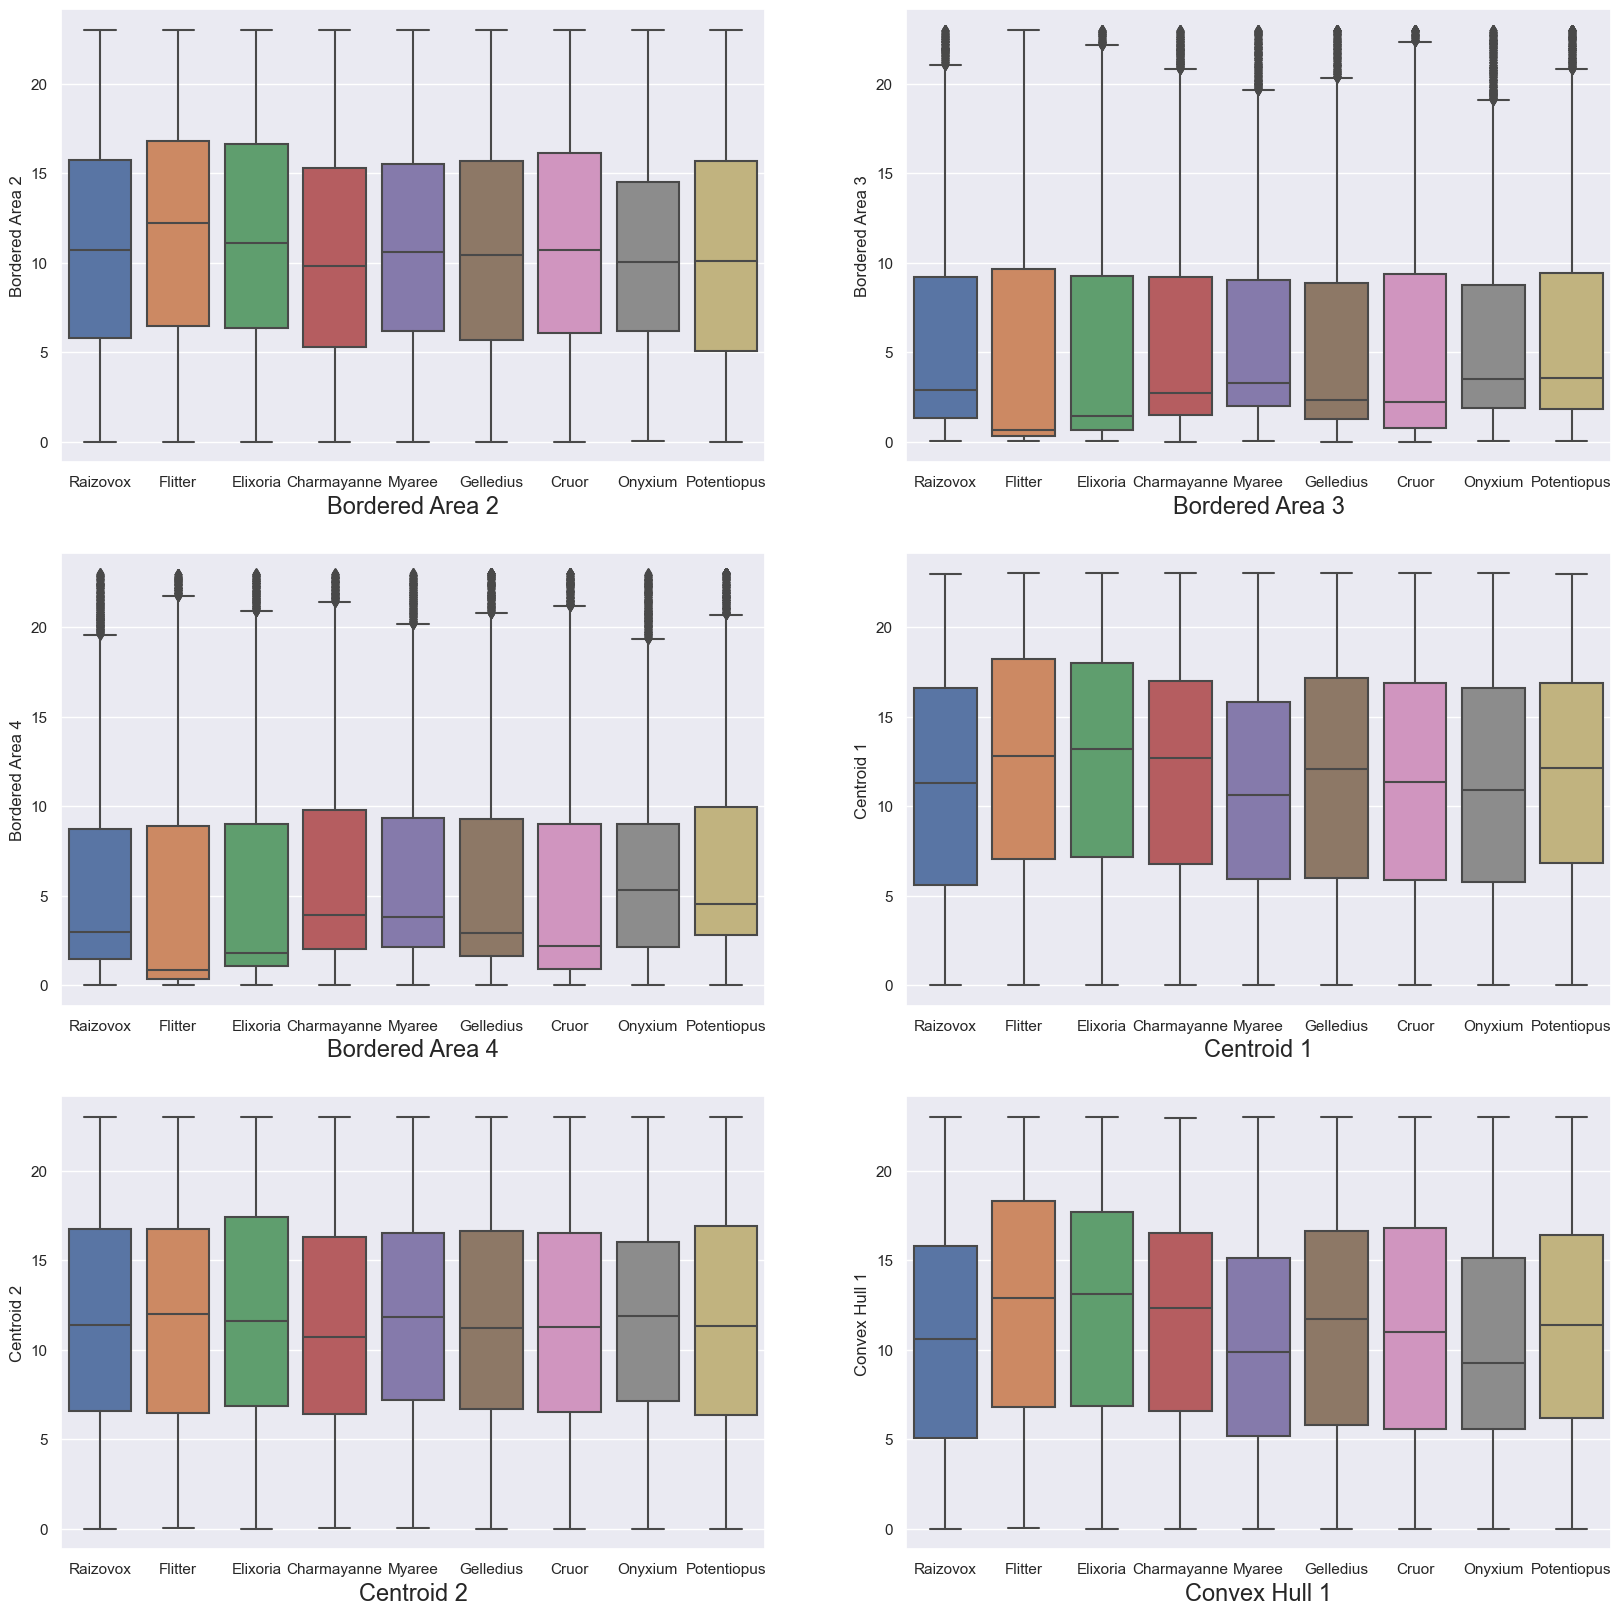

In [14]:
plt.figure(figsize=(20,20))
plotnumber=1
for j in col[12:18]:
    if plotnumber<=25:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(x='Bacteria',y=j,data=df)
        plt.xlabel('Bacteria',fontsize=17)
        plt.xlabel(j,fontsize=17)
        plotnumber+=1

# Part 2: Feature Engenieering and Preprocessing

(a) Removing multicolineirity

In [15]:
threshold=0.5

In [16]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
correlation(df.iloc[:,:-1],threshold)

{'Bordered Area 1',
 'Bordered Area 3',
 'Bordered Area 4',
 'Centroid 1',
 'Centroid 2',
 'Convex Area',
 'Convex Hull 1',
 'Convex Hull 2',
 'Convex Hull 3',
 'Convex Hull 4',
 'Equivalent Radius',
 'Filled Area',
 'Length of Major Axis',
 'Length of Minor Axis'}

## EMBEDDED METHOD ( Feature Importance)

In [19]:
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
df['Bacteria']=df['Bacteria'].replace({'Raizovox':0,'Flitter':1,'Elixoria':2,'Charmayanne':3,'Myaree':4,
                                      'Gelledius':5,'Cruor':6,'Onyxium':7,'Potentiopus':8})

In [21]:
x1=df.drop('Bacteria',axis=1)
y1=df['Bacteria']

In [22]:
etc=ExtraTreesClassifier(n_estimators=500)
etc.fit(x1,y1)

ExtraTreesClassifier(n_estimators=500)

In [23]:
etc.feature_importances_*100

array([4.40503854, 4.07552474, 3.89069812, 5.25426458, 5.24414054,
       4.24583181, 5.70787996, 7.41488547, 5.72451439, 4.69765098,
       4.52928771, 4.07881385, 5.25852978, 4.71901198, 5.12270197,
       4.11257116, 5.13263349, 4.08660693, 4.10252332, 4.12224458,
       4.0746461 ])

In [24]:
score_ETC=pd.DataFrame(etc.feature_importances_*100)

In [25]:
cols=x1.columns
feature_ETC=pd.DataFrame(cols)
feature_ETC.columns=["features"]
Final_score_ETC=pd.concat([feature_ETC,score_ETC],axis=1)
Final_score_ETC.columns=["features","ETC_score"]

In [26]:
Final_score=Final_score_ETC.nlargest(8,"ETC_score")
Final_score

,features,ETC_score
7,Diameter,7.414885
8,Direction,5.724514
6,Compactness,5.707880
12,Bordered Area 2,5.258530
3,Equivalent Radius,5.254265
4,Extent,5.244141
16,Centroid 2,5.132633
14,Bordered Area 4,5.122702


# Part 3: Model Making

In [27]:
a=Final_score['features'].unique()
data=df[a]
data['Bacteria']=df['Bacteria']

C:\Users\rjjai\AppData\Local\Temp\ipykernel_17696\2579381723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bacteria']=df['Bacteria']


In [28]:
data

,Diameter,Direction,Compactness,Bordered Area 2,Equivalent Radius,Extent,Centroid 2,Bordered Area 4,Bacteria
0,12.060000,19.500000,5.230000,1.640000,1.685000,1.570000,3.610000,4.930000,0
1,7.400000,21.800000,15.700000,15.300000,1.245000,11.700000,15.900000,1.210000,0
2,3.400000,22.800000,7.660000,18.900000,0.585000,5.450000,19.100000,0.671000,0
3,0.632000,15.700000,10.800000,10.100000,0.371500,4.820000,10.200000,0.441000,1
4,10.780000,12.200000,3.790000,13.500000,4.420000,1.950000,14.900000,3.400000,2
...,...,...,...,...,...,...,...,...,...
89035,31.853857,6.774368,0.789872,9.665364,8.424158,3.499194,15.574595,16.090341,6
89036,22.034965,22.395995,19.522085,1.656437,1.158803,16.062893,6.652554,3.924598,6
89037,14.754549,14.665731,18.111516,6.393223,11.247750,16.695487,2.695600,22.977247,6
89038,24.462583,11.124273,7.197988,1.030378,6.828814,19.043423,17.699832,8.408882,2


In [29]:
X=data.drop('Bacteria',axis=1)
y=data['Bacteria']

In [30]:
data['Bacteria'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [31]:
X=data.drop('Bacteria',axis=1)
y=data['Bacteria']

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Boosting

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state= 9)

In [39]:
rf = RandomForestClassifier()
Scaler=StandardScaler()

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
abc=AdaBoostClassifier(estimator=rf)

In [51]:
abc.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier())

In [44]:
abc.score(x_train,y_train)

1.0

In [52]:
abc.score(x_test,y_test)

0.6349805330937407

In [54]:
y_pred_abc=abc.predict(x_test)

print("Classification report: {}".format(classification_report(y_test,y_pred_abc)))

Classification report:               precision    recall  f1-score   support

           0       0.62      0.63      0.63      1900
           1       0.63      0.65      0.64      1871
           2       0.64      0.65      0.64      1811
           3       0.62      0.64      0.63      1940
           4       0.63      0.63      0.63      1800
           5       0.62      0.65      0.64      1833
           6       0.62      0.63      0.63      1875
           7       0.66      0.62      0.64      1808
           8       0.67      0.63      0.65      1857

    accuracy                           0.63     16695
   macro avg       0.64      0.63      0.64     16695
weighted avg       0.64      0.63      0.64     16695



# Hyper Parameter Tuning

In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
# define the model with default hyperparameters
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(x_train, y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.387954 using {'learning_rate': 1.0, 'n_estimators': 500}
0.154936 (0.001513) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.154936 (0.001513) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.154936 (0.001513) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.163237 (0.004320) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.154936 (0.001513) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.163018 (0.004112) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.214054 (0.005008) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.216879 (0.002268) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.214688 (0.004479) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.216879 (0.002268) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.225964 (0.003582) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.297517 (0.006338) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.225415 (0.002878) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.294233

In [74]:
abc=AdaBoostClassifier(estimator=rf,learning_rate=1,n_estimators=500)

In [75]:
abc.fit(x_train,y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), learning_rate=1,
                   n_estimators=500)

In [76]:
abc.score(x_train,y_train)

1.0

In [77]:
abc.score(x_test,y_test)

0.6348607367475292

In [78]:
test_df=pd.read_csv('test_data.csv',index_col=[0])

In [79]:
test_df=test_df[a]

In [80]:
test_df

,Diameter,Direction,Compactness,Equivalent Radius,Bordered Area 2,Extent,Centroid 2,Bordered Area 4
0,1.444000,17.700000,8.150000,0.525000,6.620000,3.710000,6.830000,0.729000
1,6.800000,6.730000,15.400000,1.755000,13.300000,7.700000,13.900000,1.630000
2,16.660000,16.100000,7.420000,2.250000,5.110000,3.890000,5.950000,2.970000
3,11.640000,1.580000,8.760000,1.610000,12.200000,4.930000,13.400000,3.340000
4,14.100000,17.700000,5.820000,2.280000,9.920000,3.590000,11.500000,3.340000
...,...,...,...,...,...,...,...,...
24110,10.529871,19.500015,12.540516,9.070423,16.174654,22.094411,8.972265,22.382569
24111,14.065895,22.241833,11.365499,5.548892,11.505571,20.653766,3.178938,17.756877
24112,8.876414,4.874545,22.258412,0.574818,8.893547,12.162366,5.473467,14.650210
24113,12.172326,3.683321,16.877100,2.375079,15.446464,19.212798,15.650620,12.025901


In [81]:
pred=abc.predict(test_df)

In [82]:
pred=pd.DataFrame(pred,columns=['Bacteria'])

In [83]:
pred=pred.reset_index()
pred=pred.rename(columns={'index':'ID'})

In [84]:
pred

,ID,Bacteria
0,0,1
1,1,0
2,2,6
3,3,8
4,4,7
...,...,...
22259,22259,3
22260,22260,2
22261,22261,7
22262,22262,6


In [85]:
pred['Bacteria']=pred['Bacteria'].map({0:'Raizovox',1:'Flitter',2:'Elixoria',3:'Charmayanne',4:'Myaree',
                                      5:'Gelledius',6:'Cruor',7:'Onyxium',8:'Potentiopus'})

In [86]:
pred.to_csv('Prediction_m.csv')